In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans 

# K-Means

In [3]:
df = pd.read_csv("USArrests.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.index = df.iloc[:,0]

In [5]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [6]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [7]:
df = df.iloc[:,1:5]

In [8]:
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [18]:
df.index.name = None

In [20]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [22]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [24]:
df.info

<bound method DataFrame.info of                 Murder  Assault  UrbanPop  Rape
Alabama           13.2      236        58  21.2
Alaska            10.0      263        48  44.5
Arizona            8.1      294        80  31.0
Arkansas           8.8      190        50  19.5
California         9.0      276        91  40.6
Colorado           7.9      204        78  38.7
Connecticut        3.3      110        77  11.1
Delaware           5.9      238        72  15.8
Florida           15.4      335        80  31.9
Georgia           17.4      211        60  25.8
Hawaii             5.3       46        83  20.2
Idaho              2.6      120        54  14.2
Illinois          10.4      249        83  24.0
Indiana            7.2      113        65  21.0
Iowa               2.2       56        57  11.3
Kansas             6.0      115        66  18.0
Kentucky           9.7      109        52  16.3
Louisiana         15.4      249        66  22.2
Maine              2.1       83        51   7.8
Maryland

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


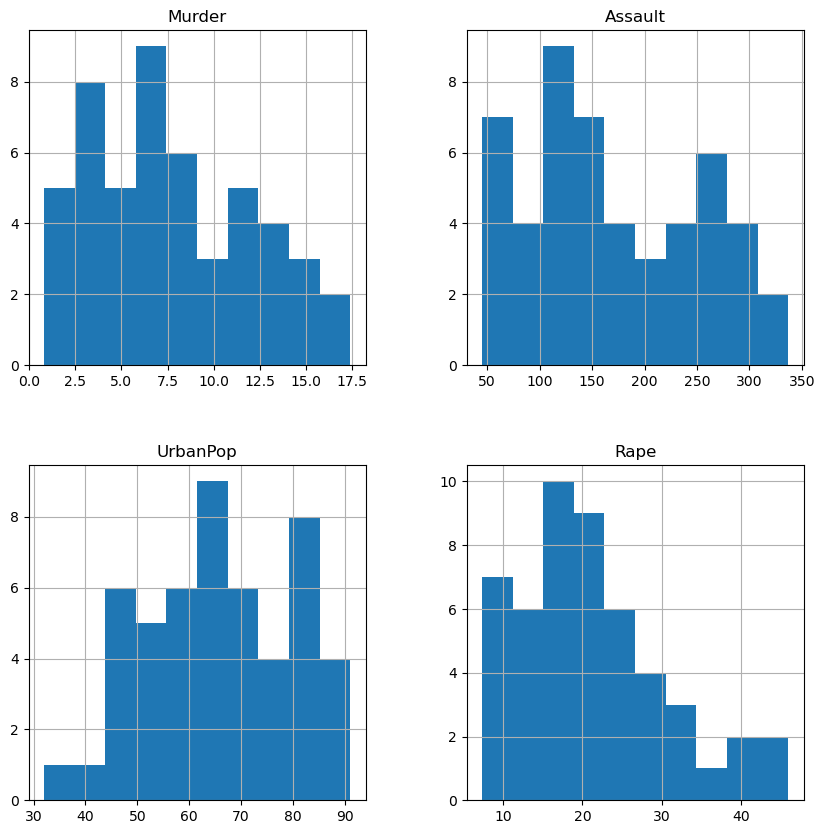

In [28]:
df.hist(figsize = (10,10));

# K-Means Model ve Görselleştirme

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(n_clusters=4)

In [41]:
k_fit = kmeans.fit(df)

In [45]:
k_fit.n_clusters

4

In [50]:
k_fit.cluster_centers_

array([[ 11.8       , 300.85714286,  68.71428571,  28.85714286],
       [  3.07272727,  66.27272727,  54.63636364,  11.96363636],
       [  6.43      , 141.6       ,  68.25      ,  19.3       ],
       [ 12.03333333, 239.25      ,  69.16666667,  28.5       ]])

In [52]:
k_fit.labels_

array([3, 3, 0, 2, 0, 3, 2, 3, 0, 3, 1, 2, 3, 2, 1, 2, 2, 3, 1, 0, 2, 3,
       1, 3, 2, 2, 1, 3, 1, 2, 0, 3, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 3, 2,
       1, 2, 2, 1, 1, 2])

In [64]:
kmeans = KMeans(n_clusters = 2)
k_fit  = kmeans.fit(df)

In [66]:
kumeler = k_fit.labels_

In [ ]:
plt.scatter(df.iloc[:,0] , df.iloc[:,1], c = kumeler , s = 50, cmap = "viridis")

merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:,0],merkezler[:,1], c = "black", s = 500,alpha = 0.5);

In [74]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
!pip install --upgrade matplotlib
import mpl_toolkits

In [ ]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_

In [ ]:
plt.rcParams["figure.figsize"] = (16,9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:, 2]);

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0],merkezler[:,1],merkezler[:,2],
           marker = "*",
           c = "#050505",
           s = 1000);